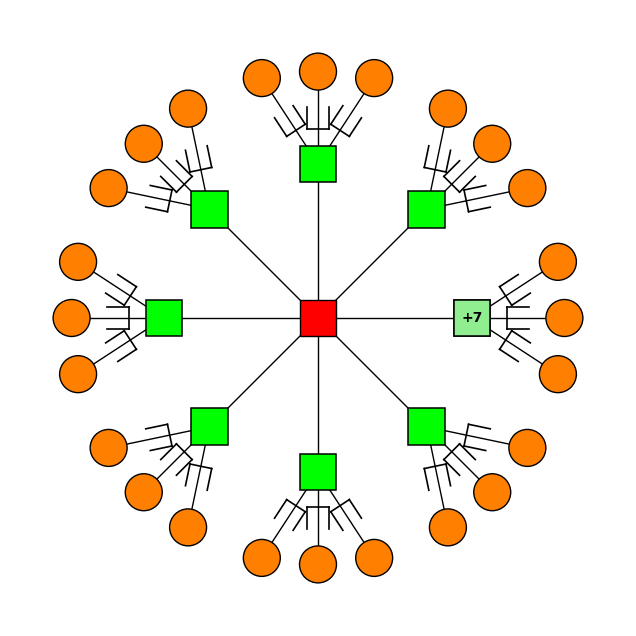

In [65]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

def draw_open_square(ax, center, size=1.0, color='#90ee90', linewidth=1, angle_deg=0):
    """Рисует квадрат без верхней грани, с возможностью поворота."""
    # Вершины квадрата до поворота (по часовой стрелке)
    half = size / 2
    points = np.array([
        [-half, -half],  # левая нижняя
        [ half, -half],  # правая нижняя
        [ half,  half],  # правая верхняя
        [-half,  half],  # левая верхняя
    ])
    # Поворот
    theta = np.deg2rad(angle_deg)
    rot = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    points = points @ rot.T + np.array(center)

    # Рисуем 3 стороны (без верхней)
    ax.plot([points[0,0], points[1,0]], [points[0,1], points[1,1]], color=color, linewidth=linewidth) # низ
    ax.plot([points[1,0], points[2,0]], [points[1,1], points[2,1]], color=color, linewidth=linewidth) # право
    ax.plot([points[3,0], points[0,0]], [points[3,1], points[0,1]], color=color, linewidth=linewidth) # лево

def draw_graph_grouped(num_green, num_orange_per_green, outer_radius, inner_radius, group_spread=0.23, 
                       square_size=0.2, circle_size=0.5, center_size=0.4):
    fig, ax = plt.subplots(figsize=(8, 8))

    # Центральный квадрат
    ax.add_patch(
        patches.Rectangle((-center_size/2, -center_size/2), center_size, center_size, 
                          facecolor="red", edgecolor="black", linewidth=1, zorder=3)
    )

    max_display_green_nodes = 8
    num_green2 = min(num_green, max_display_green_nodes)
    angles = np.linspace(np.pi / 2, 2.5 * np.pi, num_green2, endpoint=False)

    green_positions = []
    for angle in angles:
        x = inner_radius * np.cos(angle)
        y = inner_radius * np.sin(angle)
        green_positions.append((x, y))

    extra_count = 0
    if num_green > max_display_green_nodes:
        extra_count = num_green - max_display_green_nodes
        right_angle = 0
        extra_pos = (inner_radius * np.cos(right_angle), inner_radius * np.sin(right_angle))

    # Линии от центра к зелёным квадратам
    for x, y in green_positions:
        ax.plot([0, x], [0, y], color="black", linewidth=1, zorder=1)

    # Обычные зелёные квадраты
    for x, y in green_positions:
        square = patches.Rectangle((x - square_size / 2, y - square_size / 2), square_size, square_size,
                                   facecolor='#00ff00', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)

    # Если есть правый квадрат, рисуем его обычным
    if extra_count > 0:
        square = patches.Rectangle((extra_pos[0] - square_size / 2, extra_pos[1] - square_size / 2), square_size, square_size,
                                   facecolor='#90ee90', edgecolor="black", linewidth=1.1, zorder=3)
        ax.add_patch(square)
        ax.text(extra_pos[0], extra_pos[1], f"+{extra_count}", color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)

    # Оранжевые кружки и открытые квадраты возле них
    
        # ...existing code...
    for i, (x, y) in enumerate(green_positions):
        angle = angles[i]
        if num_orange_per_green > 3:
            # Один круг с числом внутри
            gx = outer_radius * np.cos(angle)
            gy = outer_radius * np.sin(angle)
            circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
            ax.add_patch(circle)
            ax.text(gx, gy, str(num_orange_per_green), color="black", fontsize=10, ha="center", va="center", fontweight="bold", zorder=5)
            ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
            # Открытый квадрат в центре между зеленым и оранжевым (увеличен на 50%)
            sqx = (x + gx) / 2
            sqy = (y + gy) / 2
            angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
            draw_open_square(ax, (sqx, sqy), size=square_size * 0.6, color='black', linewidth=1.2, angle_deg=angle_deg)
        else:
            sub_angles = np.linspace(-group_spread, group_spread, num_orange_per_green)
            for offset in sub_angles:
                gx = outer_radius * np.cos(angle + offset)
                gy = outer_radius * np.sin(angle + offset)
                circle = patches.Circle((gx, gy), circle_size, facecolor=(1, 0.5, 0), edgecolor="black", linewidth=1, zorder=4)
                ax.add_patch(circle)
                ax.plot([x, gx], [y, gy], color="black", linewidth=1, zorder=1)
                # Открытый квадрат в центре между зеленым и оранжевым (увеличен на 50%)
                sqx = (x + gx) / 2
                sqy = (y + gy) / 2
                angle_deg = np.rad2deg(np.arctan2(gy - sqy, gx - sqx)) - 90
                draw_open_square(ax, (sqx, sqy), size=square_size * 0.6, color='black', linewidth=1.2, angle_deg=angle_deg)
    # ...existing code...



    ax.set_aspect('equal')
    ax.set_xlim(-outer_radius - 2, outer_radius + 2)
    ax.set_ylim(-outer_radius - 2, outer_radius + 2)
    ax.axis('off')
    plt.show()

# Пример использования:
draw_graph_grouped(num_green=15, num_orange_per_green=3, outer_radius=8, inner_radius=5, square_size=1.2, circle_size=0.6, center_size=1.2)